<a href="https://colab.research.google.com/github/ajrotert/Machine-Learning/blob/master/UsingNeuralNetworkLibrary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Neural Network Design

Model using Normal Distribution 

In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import files
import io

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

uploaded = files.upload()
#dataset is used for the training data
dataset = pd.read_csv(io.BytesIO(uploaded['train_cleaned.csv']), sep=",")

Saving train_cleaned.csv to train_cleaned (3).csv


    initial setup


In [47]:
dataset.describe()

,Survived,Pclass,Sex,Age_band,Family_Size,Fare_cat,C,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,1.439955,0.904602,1.505051,0.188552,0.725028
std,0.486592,0.836071,0.477990,0.842373,1.613459,1.118148,0.391372,0.446751
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,4.000000,10.000000,3.000000,1.000000,1.000000


    For the neural network to work all the categories need to be numeric. This dataset is already cleaned so there is no need to change anything.

In [48]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler(copy=True)

train_std = scaler.fit_transform(X=dataset.iloc[:,1:], y=dataset.iloc[:,0]) #X = All the rows, and columns after 1

train_std

array([[ 0.82737724, -0.73769513, -0.52257377, ..., -1.34677659,
        -0.48204268,  0.61583843],
       [-1.56610693,  1.35557354,  0.66521508, ...,  1.33773782,
         2.0745051 , -1.62380254],
       [ 0.82737724,  1.35557354, -0.52257377, ..., -0.45193845,
        -0.48204268,  0.61583843],
       ...,
       [ 0.82737724,  1.35557354, -0.52257377, ...,  0.44289968,
        -0.48204268,  0.61583843],
       [-1.56610693, -0.73769513, -0.52257377, ...,  0.44289968,
         2.0745051 , -1.62380254],
       [ 0.82737724, -0.73769513, -0.52257377, ..., -1.34677659,
        -0.48204268, -1.62380254]])

    Standard Scaler From the scikit-learn library 

In [49]:
print(train_std[:,0].mean())
print(train_std[:,0].std())

-8.77213254024815e-17
0.9999999999999999


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_std, dataset.iloc[:,0], test_size=.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(712, 7)
(179, 7)
(712,)
(179,)


    Splitting data into testing and training datasets

1. For each layer define the number of hidden and output layer nodes
2. Define the number of hidden layers to use.
3. Define the structure of the activation function in the output layer.

  a. Binary: sigmoid

  b. Multiclass: k nodes with a softmax

  c. Regression: One node with no activation

4. Defien a loss function.

  a. Binary classification: binary cross-entropy

  b. Multiclass classification: categorical cross-entropy

  c. Regression: Mean square error
  
5. Define an optimizer.


In [0]:
#%tensorflow_version 2.x
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

network = models.Sequential()

In [0]:
network.add(layers.Dense(units=16, activation="elu", input_shape=(7,))) #input

    Input Layer starts as dense, meaning that every node is connected from the start
    Activation function we are using is elu

In [0]:
network.add(layers.Dense(units=16, activation="elu")) #Hidden
network.add(layers.Dense(units=16, activation="elu"))
network.add(layers.Dense(units=16, activation="elu"))

    Adding Hidden layers. Adding more hidden layers until the error rate stops changing

In [0]:
network.add(layers.Dense(units=1, activation="sigmoid"))

    Output Layer uses the sigmoid function for values between 0 and 1

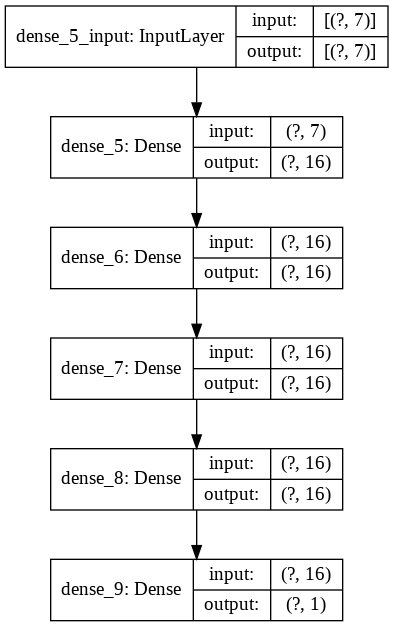

In [55]:
from tensorflow.keras.utils import plot_model
plot_model(network, show_shapes=True)
#? are unknown amount of observations.

    Visualize Model

In [0]:
nag = optimizers.SGD(learning_rate=0.01, momentum=.9, nesterov=True )

In [0]:
network.compile(optimizer=nag, loss='binary_crossentropy', metrics=['accuracy'])

    Compiling neural network: define the Loss, optimizer, and what metric we want to optimize
    Binary classification: binary_crossentropy will be used for loss function

In [58]:
history = network.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)

Train on 712 samples, validate on 179 samples
Epoch 1/10
712/712 - 0s - loss: 0.5651 - acc: 0.7205 - val_loss: 0.4635 - val_acc: 0.7821
Epoch 2/10
712/712 - 0s - loss: 0.4522 - acc: 0.7795 - val_loss: 0.4253 - val_acc: 0.8212
Epoch 3/10
712/712 - 0s - loss: 0.4407 - acc: 0.7963 - val_loss: 0.4418 - val_acc: 0.7821
Epoch 4/10
712/712 - 0s - loss: 0.4416 - acc: 0.7879 - val_loss: 0.4179 - val_acc: 0.8268
Epoch 5/10
712/712 - 0s - loss: 0.4311 - acc: 0.7992 - val_loss: 0.4284 - val_acc: 0.7989
Epoch 6/10
712/712 - 0s - loss: 0.4230 - acc: 0.8090 - val_loss: 0.4165 - val_acc: 0.8212
Epoch 7/10
712/712 - 0s - loss: 0.4303 - acc: 0.7907 - val_loss: 0.4239 - val_acc: 0.8268
Epoch 8/10
712/712 - 0s - loss: 0.4190 - acc: 0.8048 - val_loss: 0.4183 - val_acc: 0.8212
Epoch 9/10
712/712 - 0s - loss: 0.4168 - acc: 0.8006 - val_loss: 0.4225 - val_acc: 0.8045
Epoch 10/10
712/712 - 0s - loss: 0.4168 - acc: 0.8090 - val_loss: 0.4289 - val_acc: 0.8045


    Model is trained

In [59]:
predict = network.predict(X_test[0:9, :])#First 10 rows, and all columns
print("Probability of survival:")
print(predict)
print("Actual Results:")
print(y_test[0:9])

Probability of survival:
[[0.08158034]
 [0.11674145]
 [0.12195256]
 [0.16326246]
 [0.10542101]
 [0.41750872]
 [0.46200722]
 [0.05667451]
 [0.89334226]]
Actual Results:
859    0
314    0
808    0
90     0
481    0
141    1
449    1
107    1
440    1
Name: Survived, dtype: int64


    Testing the data

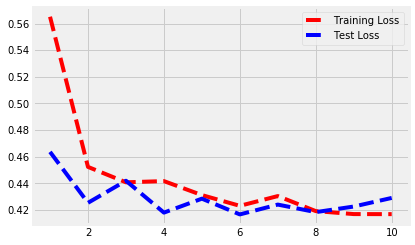

In [60]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]
epoch_count = range(1,len(train_loss)+1)

plt.plot(epoch_count, train_loss, "r--")
plt.plot(epoch_count, test_loss, "b--")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel=("Epoch")
plt.ylabel=("Loss")
plt.show()